# HW5 Assignment 1
### sac820@nyu.edu

### [Part 1:](#part-1) Create a $\chi^2$ distribution.
Play around with creating a distribution using SciPy Stats. Create a function that can be called later that creates a $\chi^2$ distribution with 20 degrees of freedom and a size of 1,000. Calculate the mean and standard deviation. Then plot a histogram to see whether or not it looks like a $\chi^2$ distribution.

### [Part 2:](#part-2) Create 100 $\chi^2$ distributions of size 1000. 
Generate N samples from a distribution of your choice other than Gaussian with a chosen mean μ and standard deviation σ such that the distribution is N(μ, σ). Plot the distribution as well as one of the samples.

### [Part 3:](#part-3) Calculate the mean for each of the 100 distributions. 
Calculate the mean of each sample (all samples should have the same size n).

### [Part 4:](#part-4) Calculate the Z-statistic for each of the 100 distributions.
Assess the validity of the Z-test: if the samples are drawn from the distribution you are testing, the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics that you calculated (one for each sample) is indeed consistent with N(0,1). Plot the distribution of z-statistics.

### [Part 5:](#part-5) Assess the goodness of fit of the Z-statistic distribution to a Gaussian.
Fit the z-statistics with a Gaussian model and assess the goodness of fit with a simple test (AD or KS).

#### Part 0: Setup Notebook <a class="anchor" id="part-0"></a>

In [1]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('classic')

%matplotlib inline

#This allows me to use LaTeX in the plot labels and titles
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#### Part 1: Create one sample from $\chi^2$ Distribution to test it out. <a class="anchor" id="part-1"></a>

Seed the pseudo-random number generator for reproducibility.

In [2]:
np.random.seed(888)

Create a sample from a $\chi^2$ distribution. 

In [3]:
def makeChiDistribution():
    '''
    Create a chi squared distribution with df of 20
    and a sample size of 1000
    '''
    #You need to define degrees of freedom for chi squared distributions
    degreeFreedom = 20

    #Loc refers to location
    #Scale refers to scale
    #Size is shape of random variates
    #The farther you place the location right on the number line, the more Gaussian it becomes
    chiDistribution = scipy.stats.chi2.rvs(degreeFreedom, loc=1000, scale=100, size=1000)
    return chiDistribution

chiDistribution = makeChiDistribution()

Calculate and print the mean and standard deviation.

In [4]:
print('Sample mean: {a:5F}'.format(a = chiDistribution.mean()))
print('Sample standard deviation: {a:5F}'.format(a = chiDistribution.std()))
print('Sample standard error: {a:5F}'.format(a = (chiDistribution.std()) / 1000))

Sample mean: 3005.955711
Sample standard deviation: 623.611260
Sample standard error: 0.623611


Plot a histogram to see whether or not it looks like a $\chi^2$ distribution.

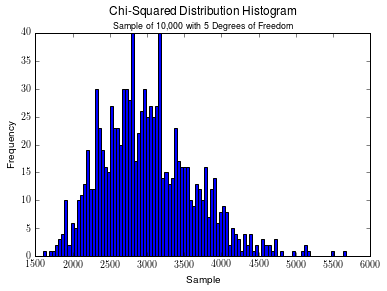

In [5]:
plt.figure
plt.hist(chiDistribution, 100)
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.title('Chi-Squared Distribution Histogram\n\small{Sample of 10,000 with 5 Degrees of Freedom}');

<center>**Figure 1: As we push a $\chi^2$ distribution rightward on the number line, the distribution begins to look more Gaussian.**<center>

#### Part 2: Create 100 samples from Chi Squared Distribution <a class="anchor" id="part-2"></a>

Define an empty numpy array of dimensions (100, 10000) to fill with the samples. We are making 100 sample distributions each with a sample size of 10,000.

In [7]:
chiDistributions = np.zeros((100, 1000))

In [8]:
for i in range(0,100):
    chiDistributions[i] = makeChiDistribution()

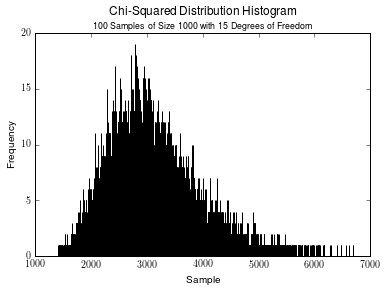

In [17]:
plt.figure
plt.hist(chiDistributions, 50)
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.title('Chi-Squared Distribution Histogram\n\small{100 Samples of Size 1000 with 15 Degrees of Freedom}');

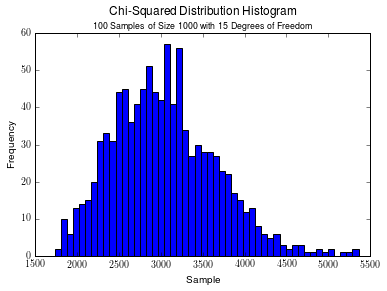

In [30]:
plt.figure
plt.hist(chiDistributions[5], 50)
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.title('Chi-Squared Distribution Histogram\n\small{100 Samples of Size 1000 with 15 Degrees of Freedom}');

#### Part 3: Calculate the mean for each sample <a class="anchor" id="part-3"></a>

In [10]:
distributionMeans = np.zeros(100)

for i in range(0,100):
    distributionMeans[i] = chiDistributions[i].mean()

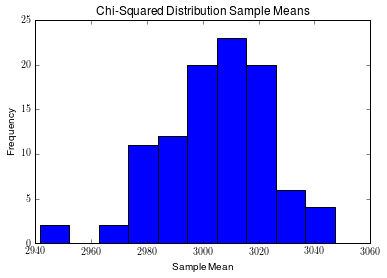

In [15]:
plt.figure
plt.hist(distributionMeans)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Chi-Squared Distribution Sample Means');

In [18]:
#Calculate mean of all samples

totalMean = chiDistributions.mean()
totalSTD = chiDistributions.std()

In [19]:
samplesMean = distributionMeans.mean()
samplesSTD = distributionMeans.std()

In [20]:
print(totalMean, totalSTD)

3003.86638468 633.639803717


In [21]:
print(samplesMean, samplesSTD)

3003.86638468 18.7602648721


#### Part 4: Assess the validity of the z-test <a class="anchor" id="part-4"></a>

In [23]:
def calculateZ(distribution, mu, std):
    z = ((mu - distribution.mean()) / (std) ) * np.sqrt(len(distribution))
    return z

In [24]:
mu = 3003.86638468
std = 633.639803717

zStatistics = np.zeros(100)

for i in range(1,100):
    zStatistics[i] = calculateZ(chiDistributions[i], mu, std)

In [32]:
print('Sample mean: {a:5F}'.format(a = zStatistics.mean()))
print('Sample standard deviation: {a:5F}'.format(a = zStatistics.std()))

Sample mean: 0.012307
Sample standard deviation: 0.928054


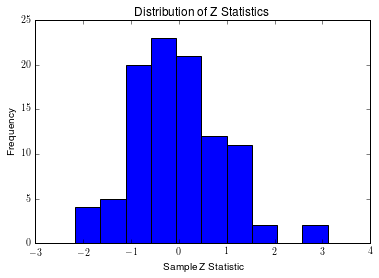

In [29]:
plt.figure
plt.hist(zStatistics)
plt.xlabel('Sample Z Statistic')
plt.ylabel('Frequency')
plt.title('Distribution of Z Statistics');

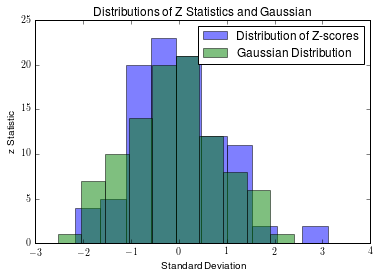

In [36]:
#Create a Gaussian distribution with which to compare
gaussDistribution = np.random.normal(0, 1, 100)

plt.figure
plt.hist(zStatistics, alpha=0.5, label='Distribution of Z-scores')
plt.hist(gaussDistribution, alpha=0.5, label='Gaussian Distribution')
plt.legend()
plt.xlabel('Standard Deviation')
plt.ylabel('z Statistic')
plt.title('Distributions of Z Statistics and Gaussian');

#### Part 5: Fit z-statistic to a Gaussian model and assess goodness of fit <a class="anchor" id="part-5"></a>

In [31]:
scipy.stats.kstest(zStatistics, "norm")

KstestResult(statistic=0.07900632288593451, pvalue=0.54502868328874521)